## <font color = purple> Twitter Sentiment Analysis </font>

In [44]:
# import libraries
import os 
import pandas as pd
import nltk
import seaborn as sns

In [7]:
# Read the data
df = pd.read_csv("twitter_training.csv", header = None)
df.columns = ['#', 'Refers to', 'Sentiment', 'Text']
df.head()

,#,Refers to,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
# Checking for nulls
df.isnull().sum()

#              0
Refers to      0
Sentiment      0
Text         686
dtype: int64

In [9]:
# Remove nulls
df.dropna(inplace=True, axis=0)
df.head()
df.shape

(73996, 4)

In [10]:
# Word tokenization using nltk
from string import punctuation
stop = nltk.corpus.stopwords.words('english') + list(punctuation)
from nltk.stem import WordNetLemmatizer

In [16]:
# Cleaning the text data
def cleaner(sentence):
    # tokenize the text
    clean = nltk.word_tokenize(sentence)
    # remove stopwords
    clean = [i for i in clean if not i in stop]
    # lemmatize
    lemmatizer = WordNetLemmatizer()
    clean = [lemmatizer.lemmatize(i) for i in clean]
    
    return " ".join(clean)

cleaner(df["Text"][0])

df["Clean_text"] = list(map(cleaner, df["Text"]))
df.head()

,#,Refers to,Sentiment,Text,Clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I coming border I kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland 2 murder


In [17]:
df["Clean_text"].head()

0      im getting borderland murder
1            I coming border I kill
2        im getting borderland kill
3       im coming borderland murder
4    im getting borderland 2 murder
Name: Clean_text, dtype: object

### Visualization

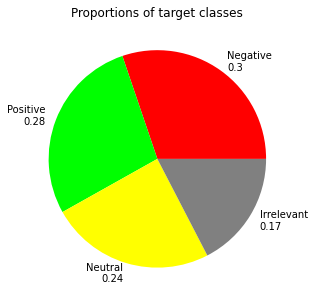

In [32]:
# Target analysis
target_balance = df["Sentiment"].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(target_balance, labels=[f'{idx}\n{round(target_balance[idx]/len(df), 2)}' for idx in target_balance.index], 
        colors=['r', '#00FF00', '#FFFF00', 'gray'])
plt.title('Proportions of target classes')
plt.show()

In [42]:
# Top words
import re
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

word_counts = {'Positive': [],
                'Neutral': [],
                'Irrelevant': [],
                'Negative': []}

pattern = re.compile('[^\w ]')
for text, t in zip(df['Text'], df["Sentiment"]):
    text = re.sub(pattern, '', text).lower().split()
    text = [word for word in text if word not in stopwords_list]
    word_counts[t].extend(text)

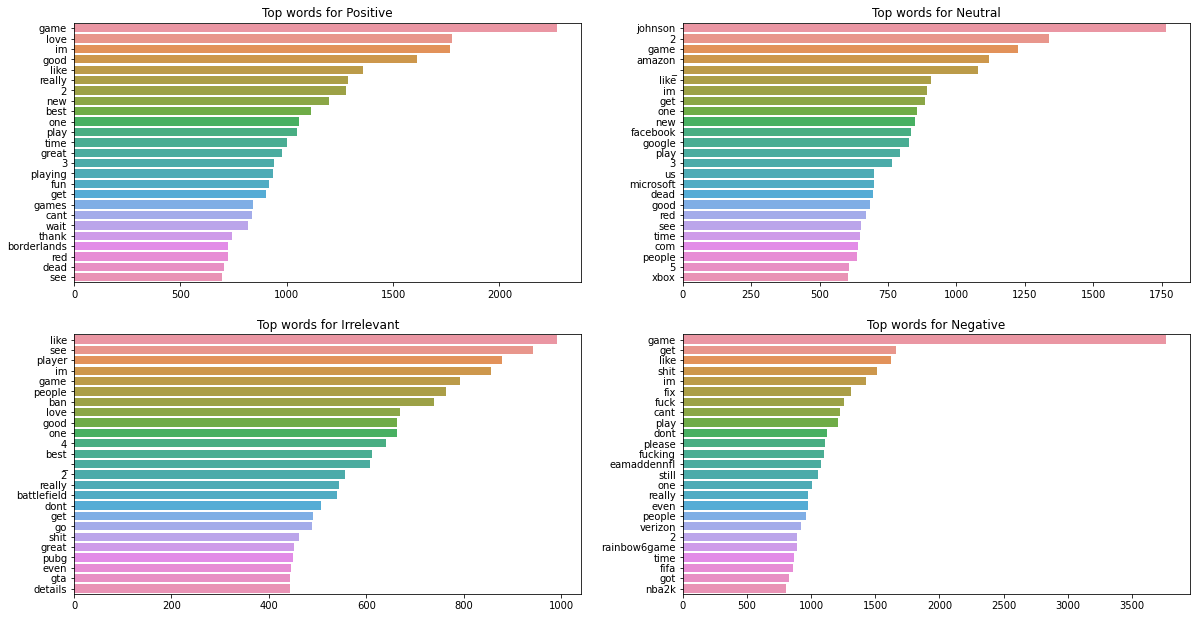

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(20,10.5))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Top words for {target}')
plt.show()

### Building a regression model

In [18]:
# Initialize a NLP model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [19]:
# Identify x and y
x = df["Clean_text"]
y = df["Sentiment"]

In [58]:
# Vectorize the data
vector = CountVectorizer()
X = vector.fit_transform(x)
print(vector.get_feature_names_out())
# X.toarray()

# dy = pd.DataFrame(X.toarray(), columns = vector.get_feature_names_out())
# dy.head()

['00' '000' '00011' ... 'การออกอากาศของฉ' 'นจาก' 'ℐℓ٥']


In [21]:
# Create a train test split
x_train, x_test,y_train,y_test = train_test_split(X,y)
model =  MultinomialNB()
# Train the model
model.fit(x_train,y_train)

MultinomialNB()

In [22]:
# Accuracy of the model 
pred = model.predict(x_test)
print(accuracy_score(pred, y_test))

0.7492837450673009


### Testing the model

In [26]:
# Testing the model
quest = [ "He is a very cocky person",
 "You are an asshole",
 "You are very beautiful",
 "Safaricom is the best company in Kenya",
 "The city has very clean pavements",
 "His girlfriend is a very mean person"
 ]

In [27]:
def predictor(text):
  text = cleaner(text)
  text = [text]
  final = vector.transform(text)
  prediction = model.predict(final)
  return prediction[0]

In [28]:
for question in quest:
  print(f"{question} ..................Sentiment:{predictor(question)}")

He is a very cocky person ..................Sentiment:Irrelevant
You are an asshole ..................Sentiment:Negative
You are very beautiful ..................Sentiment:Positive
Safaricom is the best company in Kenya ..................Sentiment:Positive
The city has very clean pavements ..................Sentiment:Positive
His girlfriend is a very mean person ..................Sentiment:Irrelevant


### Conclusion

To solve the given task, the raw data was preprocessed the following way:

* Texts were tokenized
* Texts were cleaned from nulls, punctuation and stop words
* Texts were lemmatized
* Texts were vectorized with count Vectorizer.

For this task, Linear regression was implemented showing an accuracy score of 75%